In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize' : (10,6)})

In [6]:
df = pd.read_csv('titanic_data.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color = 'green'>Numerical value Analysis</font>

<Axes: >

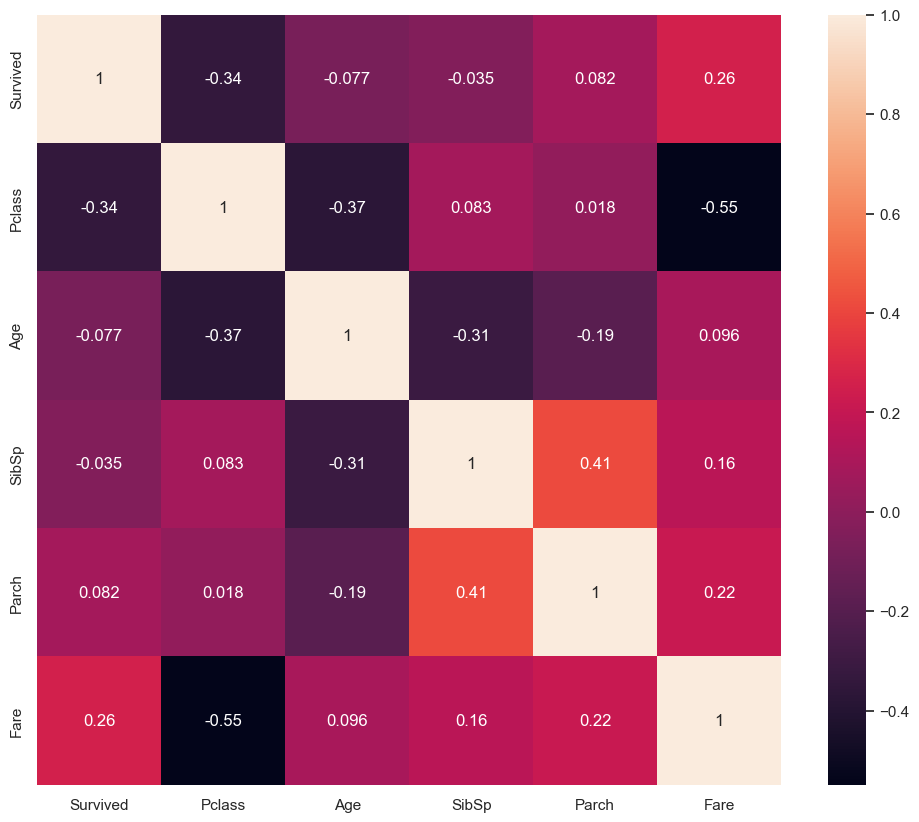

In [14]:
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True)

This doesnot mean that params other than fare do not have any impact on survived Parameter

## <font color = 'green'>sibsp - Number of siblings / spouses aboard the Titanic</font>

In [16]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

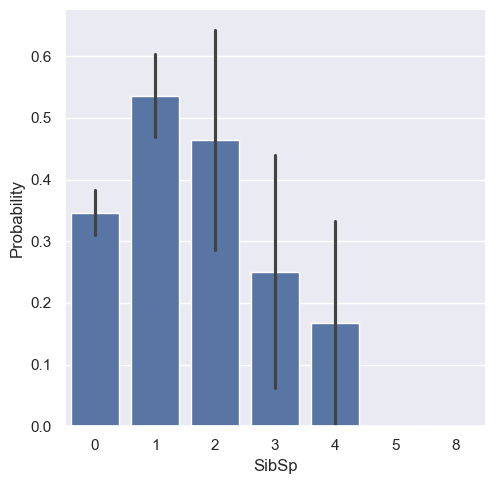

In [21]:
bargraph_sibsp = sns.catplot(df, x = 'SibSp', y = 'Survived', kind = 'bar')
bargraph_sibsp.set_ylabels('Probability')

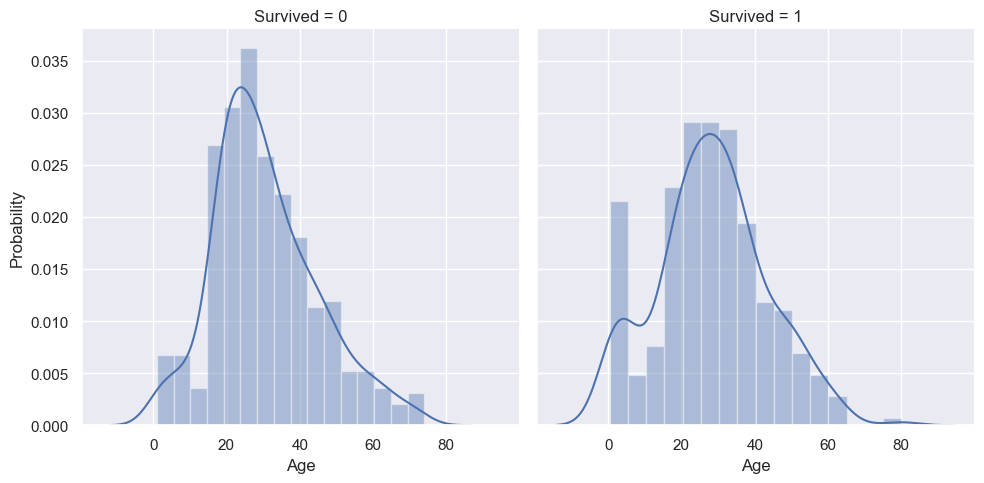

In [54]:
age_visual = sns.FacetGrid(df, col ='Survived' ,height = 5, palette = 'RdBu')
age_visual = age_visual.map(sns.distplot, 'Age')
age_visual.set_ylabels('Probability')

Text(0, 0.5, 'Probability')

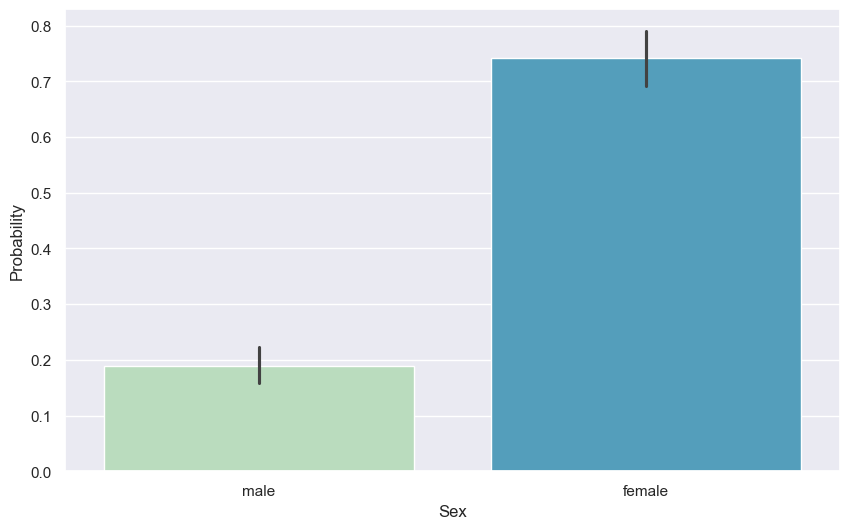

In [56]:
age_plot = sns.barplot(df, x = 'Sex', y = 'Survived', palette = 'GnBu')
age_plot.set_ylabel('Probability')

Here Sex Plays an important role in determining the Survival of a person as there is a high prob. for female to survive

## <font color = 'green'>Pclass</font>

<Axes: xlabel='Pclass', ylabel='Survived'>

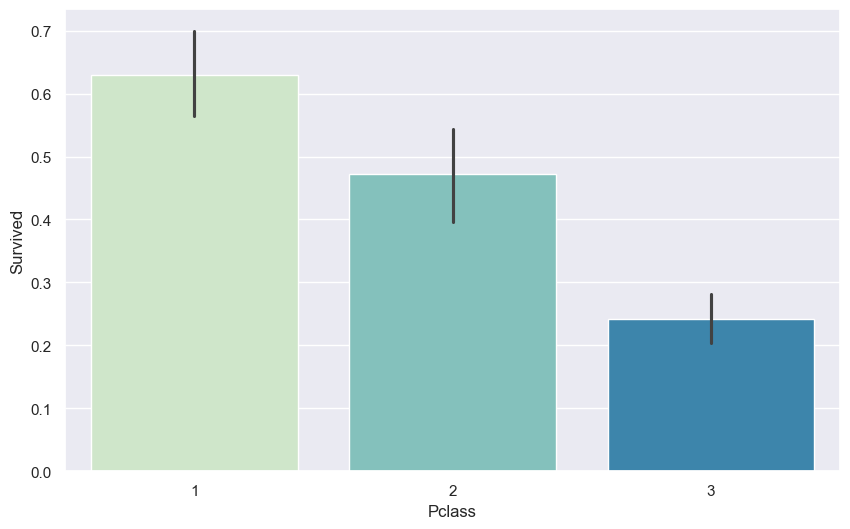

In [52]:
sns.barplot(df, x= 'Pclass', y = 'Survived', palette = 'GnBu' )

## <font color = 'green'>PClass and Sex</font>

Text(0, 0.5, 'Probability')

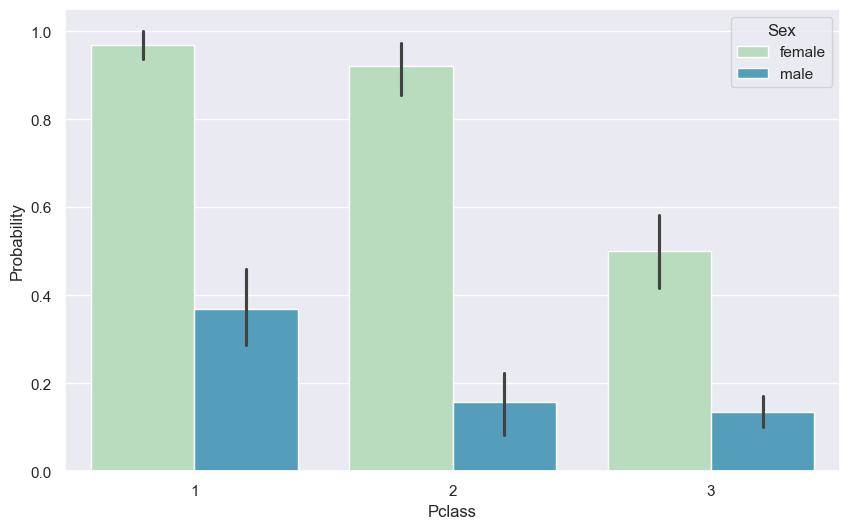

In [58]:
Pcls_sex = sns.barplot(df, x= 'Pclass', y = 'Survived', hue = 'Sex', palette = 'GnBu' )
Pcls_sex.set_ylabel('Probability')

## <font color = 'green'>Embarked</font>

In [59]:
df['Embarked'].isna().sum()

2

In [60]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [62]:
df['Embarked'].fillna('S', inplace = True)

In [63]:
df['Embarked'].isna().sum()

0

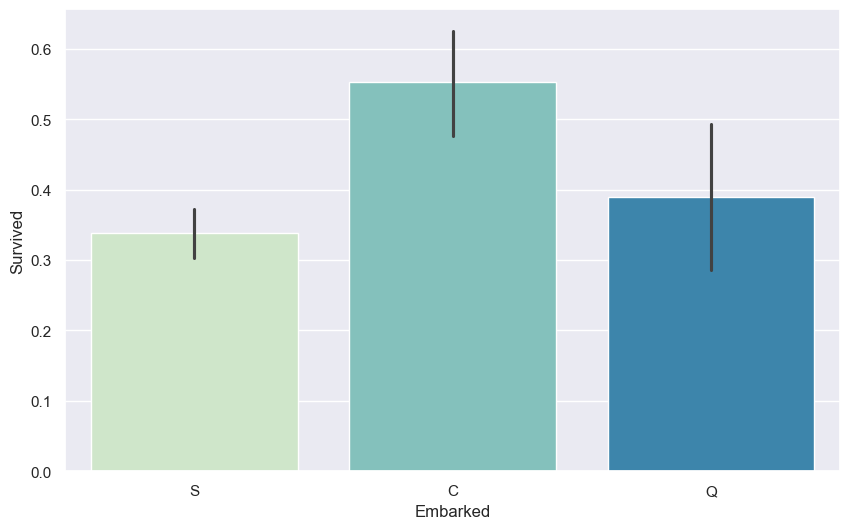

In [65]:
sns.barplot(df, x = 'Embarked', y = 'Survived', palette = 'GnBu').set_label('Probability')

Embarked from C has higher chances of survival

### Reason

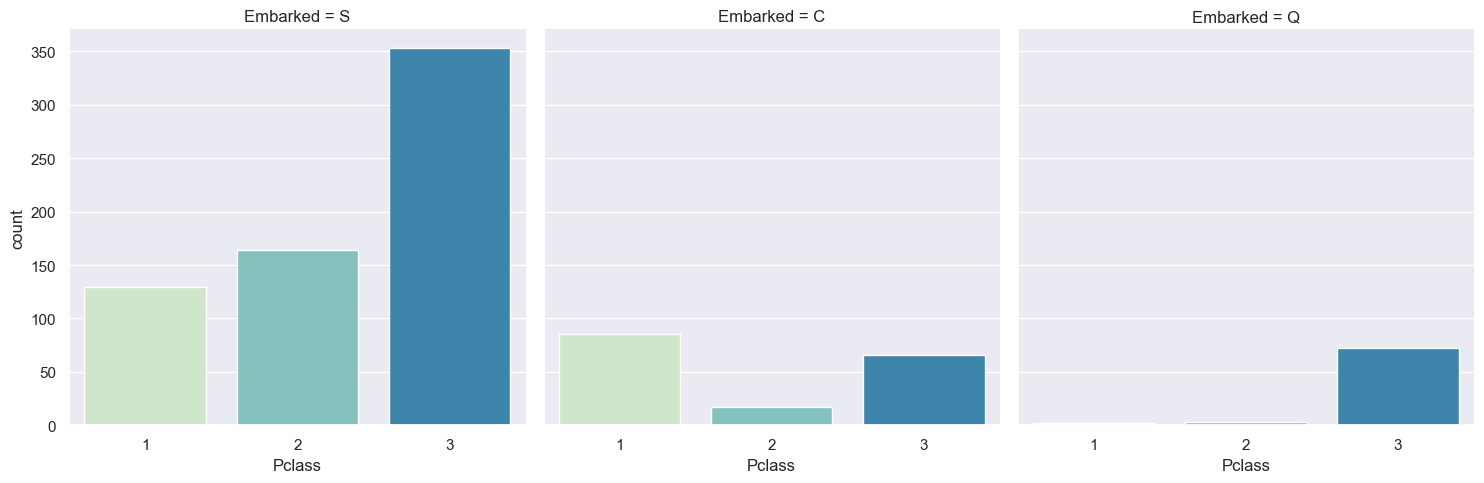

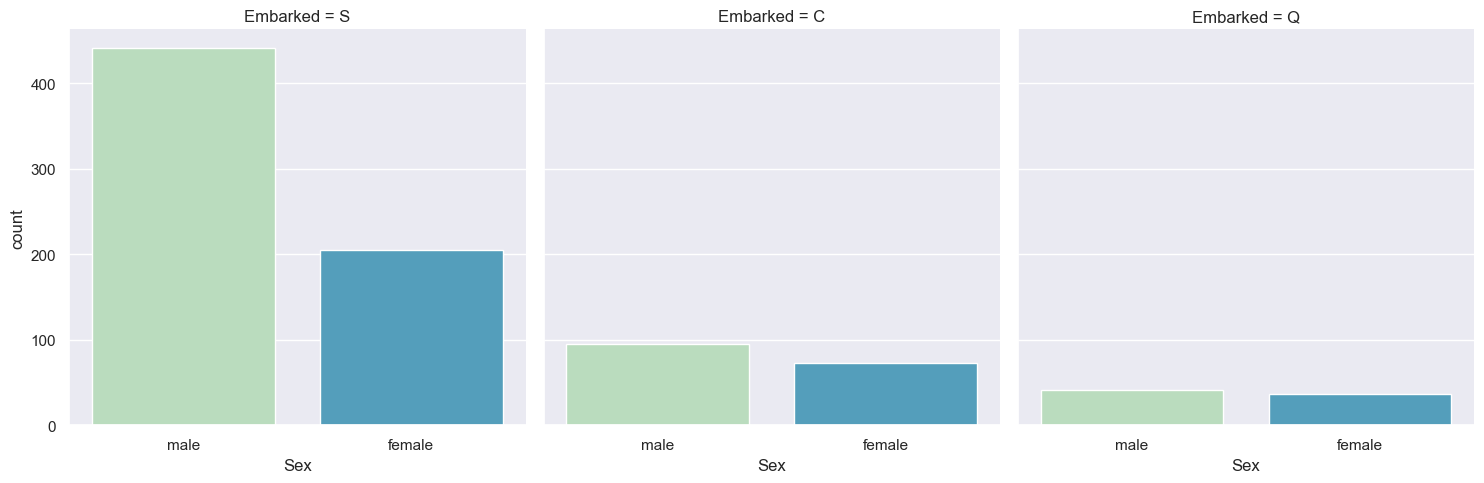

In [76]:

sns.catplot(df, x = 'Pclass', kind = 'count', palette='GnBu', col ='Embarked').set_ylabels('count')
sns.catplot(df, x = 'Sex', kind = 'count', palette='GnBu', col ='Embarked' ).set_ylabels('count')

The reason is it has more first class passangers

## Preparing the Data

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- filling the null values for age

In [79]:
mean_age = np.mean(df['Age'])
std_age = df['Age'].std()

In [80]:
print(mean_age, std_age)

29.69911764705882 14.526497332334044


In [81]:
age = df['Age'].copy()

In [84]:
rand_age = np.random.randint(mean_age - std_age, mean_age + std_age, 177)

In [85]:
age[age.isna()] = rand_age

In [86]:
df['Age'] = age

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
embark_map = {'S' : 0, 'Q' : 1, 'C' : 2}
sex_map = {'male' : 0, 'female' : 1}
df['Embarked'] = df['Embarked'].map(embark_map)
df['Sex'] = df['Sex'].map(sex_map)

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [91]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Train Test Split

In [93]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3)

## <font color = 'green'>Classification</font>

In [118]:
logistic_classifier = LogisticRegression()
randomf_classifier = RandomForestClassifier(1000, criterion = 'entropy')
decision_tree = DecisionTreeClassifier()
k_neighbour = KNeighborsClassifier()
svc = SVC()

In [119]:
logistic_classifier.fit(x_train, y_train)
randomf_classifier.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
k_neighbour.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC()

In [120]:
lc_predict = logistic_classifier.predict(x_test)
rf_predict = randomf_classifier.predict(x_test)
dt_predict = decision_tree.predict(x_test)
knn_predict = k_neighbour.predict(x_test)
svc_predict = svc.predict(x_test)

## Accuracy

In [121]:
from sklearn.metrics import accuracy_score

lc_accuracy = accuracy_score(y_test, lc_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)
knn_accuracy = accuracy_score(y_test, knn_predict)
svc_accuracy = accuracy_score(y_test, svc_predict)

In [122]:
print ("Logistic Regression : ", round(lc_accuracy*100, 2))
print ("Support Vector      : ", round(svc_accuracy*100, 2))
print ("Decision Tree       : ", round(dt_accuracy*100, 2))
print ("K-NN Classifier     : ", round(knn_accuracy*100, 2))
print ("Random Forest       : ", round(rf_accuracy*100, 2))

Logistic Regression :  78.73
Support Vector      :  80.97
Decision Tree       :  75.0
K-NN Classifier     :  79.85
Random Forest       :  79.48
